In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

print('Import successful!!!')

Import successful!!!


In [2]:
class DeepNeuralNetwork():
    def __init__(self, sizes, epochs=10, learn_rate=0.001):
        self.sizes = sizes
        self.epochs = epochs
        self.learn_rate = learn_rate

        # we save all parameters in the neural network in this dictionary
        self.params = self.initialization()

    # Activation function for hidden layers
    def sigmoid(self, x, deriv=False):
        if deriv:
            return (np.exp(-x))/((np.exp(-x)+1)**2)
        return 1/(1 + np.exp(-x))

    # Activation function for output layer
    def softmax(self, x, deriv=False):
        # Numerically stable with large exponentials
        exps = np.exp(x - x.max())
        if deriv:
            return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))
        return exps / np.sum(exps, axis=0)

    def initialization(self):
        # number of nodes in each layer
        input_layer = self.sizes[0]
        hidden_1 = self.sizes[1]
        hidden_2 = self.sizes[2]
        output_layer = self.sizes[3]

        params = {
            'W1': np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
            'W2': np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
            'W3': np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
        }

        return params

    # Propagate input through network
    def forward_propagation(self, x_train):
        params = self.params

        # input layer activations becomes sample
        params['A0'] = x_train

        # input layer to hidden layer 1
        params['Z1'] = np.dot(params['W1'], params['A0'])
        params['A1'] = self.sigmoid(params['Z1'])

        # hidden layer 1 to hidden layer 2
        params['Z2'] = np.dot(params["W2"], params['A1'])
        params['A2'] = self.sigmoid(params['Z2'])

        # hidden layer 2 to output layer
        params['Z3'] = np.dot(params["W3"], params['A2'])
        params['A3'] = self.softmax(params['Z3'])

        return params['A3']

    def backward_propagation(self, y_train, output):

        params = self.params
        w_change = {}

        # Calculate W3 update
        error = 2 * (output - y_train) / \
            output.shape[0] * self.softmax(params['Z3'], deriv=True)
        w_change['W3'] = np.outer(error, params['A2'])

        # Calculate W2 update
        error = np.dot(params['W3'].T, error) * \
            self.sigmoid(params['Z2'], deriv=True)
        w_change['W2'] = np.outer(error, params['A1'])

        # Calculate W1 update
        error = np.dot(params['W2'].T, error) * \
            self.sigmoid(params['Z1'], deriv=True)
        w_change['W1'] = np.outer(error, params['A0'])

        return w_change

    # ALgorithm to minimize objective funtion
    def gradient_descent(self, changes_to_w):
        for key, value in changes_to_w.items():
            self.params[key] -= self.learn_rate * value

    def compute_accuracy(self, x_val, y_val):

        predictions = []

        for x, y in zip(x_val, y_val):
            output = self.forward_propagation(x)
            pred = np.argmax(output)
            predictions.append(pred == np.argmax(y))

        return np.mean(predictions)

    def train(self, x_train, y_train, x_val, y_val):
        start_time = time.time()
        for iteration in range(self.epochs):
            epoch_time = time.time()
            for x, y in zip(x_train, y_train):
                output = self.forward_propagation(x)
                changes_to_w = self.backward_propagation(y, output)
                self.gradient_descent(changes_to_w)

            accuracy = self.compute_accuracy(x_val, y_val)
            etime = time.time() - epoch_time
            ttime = (time.time() - start_time) / 60
            print(
                f'Epoch: {iteration + 1} / {self.epochs}, Epoch Train Time: {etime:.2f}s, Total Time: {ttime:.2f}m, Accuracy: {accuracy*100:.2f} ')
            #print('Epoch: {0}, Time Spent: {1:.2f}s, Accuracy: {2:.2f}%'.format(iteration+1, time.time() - start_time, accuracy * 100))

    def predict(self, X):
        out = self.forward_propagation(X)
        return np.argmax(out)


## Test Using MNIST dataset

WE will test the neural network using the MNIST data set. This dataset contains 60 000 grayscale images that are 28 x 28 pixels, which consist of handwritten digits (0 to 10). We will flatten the images before inputting them into the network. So the input layer will a rank 1 tensor of length 728.

In [3]:
from sklearn.datasets import fetch_openml
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# import dataset and prepare to feed it to network
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)
x = (x/255).astype('float32')
y = to_categorical(y)

# split data
X_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.10, random_state= 42)

# Train the network
DNN = dnn = DeepNeuralNetwork(sizes=[784, 128, 64, 10], epochs=10, learn_rate=0.01)
DNN.train(X_train.values, y_train, x_val.values, y_val)

Epoch: 1 / 10, Epoch Train Time: 46.78s, Total Time: 0.78m, Accuracy: 51.46 
Epoch: 2 / 10, Epoch Train Time: 48.50s, Total Time: 1.59m, Accuracy: 66.44 
Epoch: 3 / 10, Epoch Train Time: 52.47s, Total Time: 2.46m, Accuracy: 71.89 
Epoch: 4 / 10, Epoch Train Time: 56.31s, Total Time: 3.40m, Accuracy: 76.23 
Epoch: 5 / 10, Epoch Train Time: 58.71s, Total Time: 4.38m, Accuracy: 77.67 
Epoch: 6 / 10, Epoch Train Time: 48.82s, Total Time: 5.19m, Accuracy: 77.64 
Epoch: 7 / 10, Epoch Train Time: 53.59s, Total Time: 6.09m, Accuracy: 77.67 
Epoch: 8 / 10, Epoch Train Time: 55.06s, Total Time: 7.00m, Accuracy: 78.47 
Epoch: 9 / 10, Epoch Train Time: 59.87s, Total Time: 8.00m, Accuracy: 79.17 
Epoch: 10 / 10, Epoch Train Time: 47.34s, Total Time: 8.79m, Accuracy: 79.80 


In [5]:
nn1 = dnn = DeepNeuralNetwork(sizes=[784, 128, 64, 10], epochs=5, learn_rate=0.01)
nn1.train(X_train.values, y_train, x_val.values, y_val)

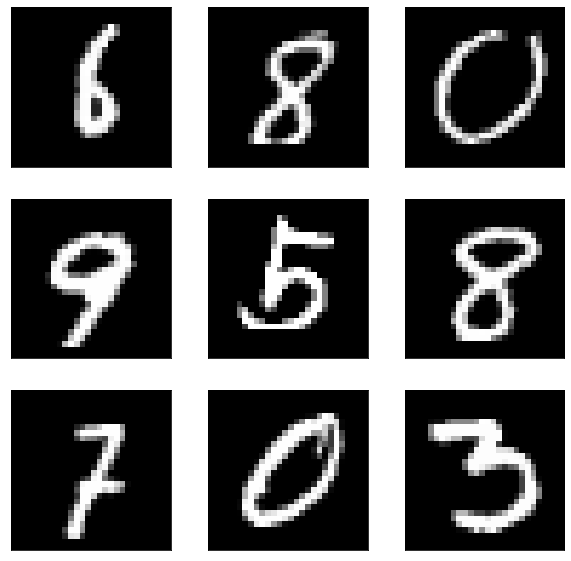

In [28]:
X = x.values
samples = X[1100:1109]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
ax[0][0].imshow(samples[0].reshape(28, 28), cmap='gray')
ax[0][1].imshow(samples[1].reshape(28, 28), cmap='gray')
ax[0][2].imshow(samples[2].reshape(28, 28), cmap='gray')
ax[1][0].imshow(samples[3].reshape(28, 28), cmap='gray')
ax[1][1].imshow(samples[4].reshape(28, 28), cmap='gray')
ax[1][2].imshow(samples[5].reshape(28, 28), cmap='gray')
ax[2][0].imshow(samples[6].reshape(28, 28), cmap='gray')
ax[2][1].imshow(samples[7].reshape(28, 28), cmap='gray')
ax[2][2].imshow(samples[8].reshape(28, 28), cmap='gray')

for i in range(3):
    for j in range(3):
        ax[i][j].axes.xaxis.set_visible(False)
        ax[i][j].axes.yaxis.set_visible(False)

plt.show()

In [43]:
expected_num = [6, 8, 0, 9, 5, 8, 7, 0, 3]

for i, image in enumerate(samples):
    prediction = DNN.predict(image)
    if prediction == expected_num[i]:
        correct = " Correct Prediction  :D"
    else:
        correct = "Incorect Prediction  :("
    print(f'Number in image is: {expected_num[i]}, The predicted number is {prediction} ' + correct)

Number in image is: 6, The predicted number is 6  Correct Prediction  :D
Number in image is: 8, The predicted number is 8  Correct Prediction  :D
Number in image is: 0, The predicted number is 0  Correct Prediction  :D
Number in image is: 9, The predicted number is 9  Correct Prediction  :D
Number in image is: 5, The predicted number is 8 Incorect Prediction  :(
Number in image is: 8, The predicted number is 8  Correct Prediction  :D
Number in image is: 7, The predicted number is 7  Correct Prediction  :D
Number in image is: 0, The predicted number is 0  Correct Prediction  :D
Number in image is: 3, The predicted number is 3  Correct Prediction  :D
